In [3]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import cleaned data file
jobs_df = pd.read_csv('Group1_cleaned_indeed_job_data.csv', na_values=['None'])

In [10]:
### DESCRIPTIVE ANALYSIS ###

Location column created. First 5 rows with Location:
          City State         Location
0    San Diego    CA    San Diego, CA
1    Palo Alto    CA    Palo Alto, CA
2     Monrovia    CA     Monrovia, CA
3  Santa Clara    CA  Santa Clara, CA
4     San Jose    CA     San Jose, CA
Total number of jobs in the dataset: 669
Job counts per location (Top 10):
San Francisco, CA          80
San Diego, CA              64
Santa Clara, CA            55
San Jose, CA               55
Los Angeles, CA            44
State of California, CA    37
Sunnyvale, CA              36
Cupertino, CA              35
Mountain View, CA          30
South San Francisco, CA    28
Name: Location, dtype: int64
Concentration of jobs per location (Top 10):
San Francisco, CA          11.958146
San Diego, CA               9.566517
Santa Clara, CA             8.221226
San Jose, CA                8.221226
Los Angeles, CA             6.576981
State of California, CA     5.530643
Sunnyvale, CA               5.381166
Cupertino, 

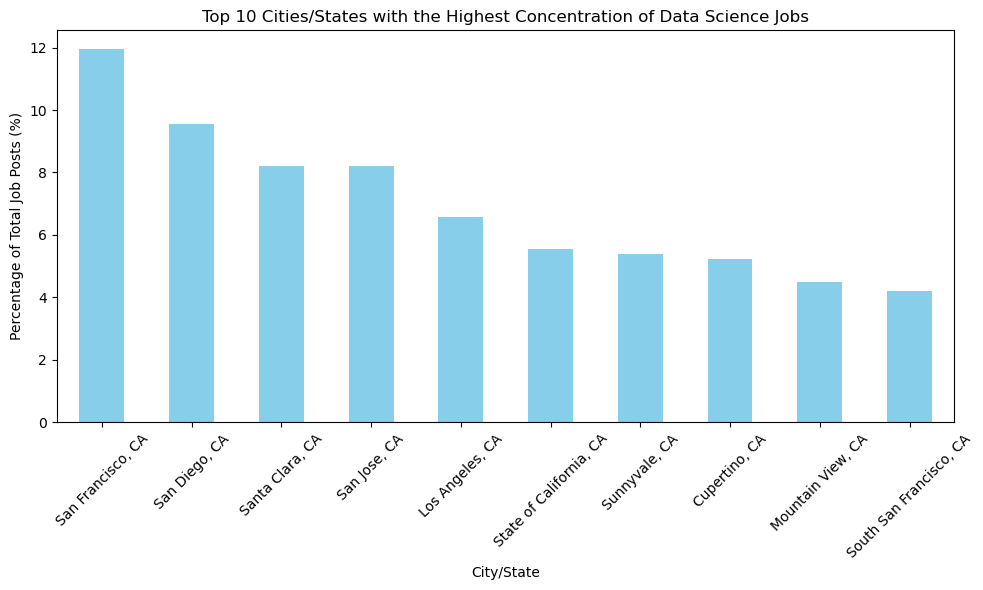

In [11]:
# 1. Job Distribution by Location
# Combine the 'City' and 'State' columns into a single 'Location' column
jobs_df['Location'] = jobs_df['City'] + ', ' + jobs_df['State']

# Check if the 'Location' column is created correctly
print("Location column created. First 5 rows with Location:")
print(jobs_df[['City', 'State', 'Location']].head())

# Total number of data science jobs in the dataset
total_jobs = len(jobs_df)
print(f"Total number of jobs in the dataset: {total_jobs}")

# Count the number of jobs posted in each city/state (location)
location_counts = jobs_df['Location'].value_counts()

# Check the job counts for each location
print("Job counts per location (Top 10):")
print(location_counts.head(10))

# Calculate the concentration (percentage) of jobs in each location
location_concentration = (location_counts / total_jobs) * 100

# Check the concentration values
print("Concentration of jobs per location (Top 10):")
print(location_concentration.head(10))

# Get the top 10 locations with the highest concentration of data science jobs
top_10_concentration = location_concentration.head(10)

# Plot the data in a bar chart
plt.figure(figsize=(10,6))
top_10_concentration.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities/States with the Highest Concentration of Data Science Jobs')
plt.xlabel('City/State')
plt.ylabel('Percentage of Total Job Posts (%)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

              Job Area  Job Count
0          SF Bay Area        406
1      Non SF Bay Area        226
2  State of California         37


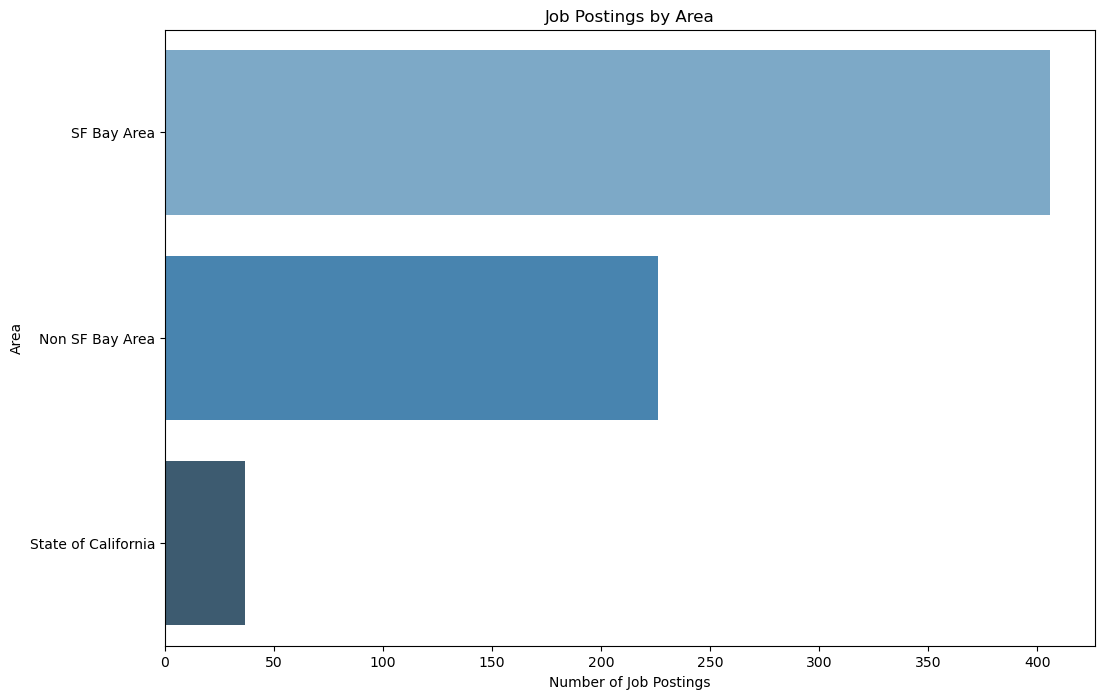

In [8]:
# 1. Job Distribution by Location
# Count the number of job postings by job area
area_count = jobs_df['Job Area'].value_counts().reset_index()
area_count.columns = ['Job Area', 'Job Count']
print(area_count)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Count', y='Job Area', data=area_count, palette='Blues_d')
plt.title('Job Postings by Area')
plt.xlabel('Number of Job Postings')
plt.ylabel('Area')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


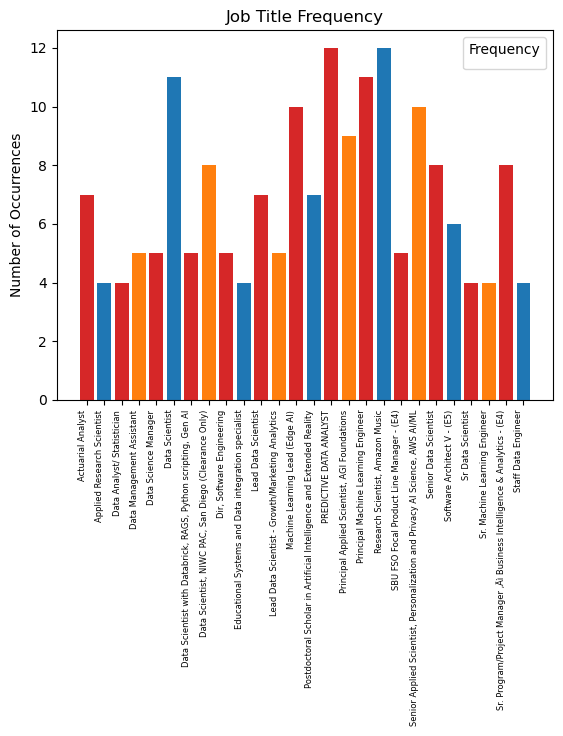

Total Records:  542
Duplicates > 1 and < 3:  263
Duplicates > 3 (Reflected in the Bar Chart):  279


In [12]:
# 2. Job Title Frequency under Data Science Job Family
def title_frequency():
    fig, ax = plt.subplots()

    # to calculate the total number of records.
    count = 0

    # A Dictionary to hold the data that will be parsed.
    data = {}

    # Needed to sort the results of duplicates greater than 3
    results = {}

    # lists to store data
    bar_count = []
    bar_data = []
    bar_single = []

    result = pd.read_excel('sorted_analysis_two.xlsx')

    # build dictionary
    for i in result['Analysis']:
        data[i] = data.get(i, 0) + 1

    # walk dictionary
    for k, v in data.items():
        if v > 3:  # only test for values that are greater than 3
            bar_data.append(k)
            bar_count.append(v)
            results[k] = v
            # Debug Info
            # print("Duplicate [ ", k, " -> ", v, " ]")
        else:
            bar_single.append(k)

    bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

    # draw bar
    ax.bar(bar_data, bar_count, color=bar_colors)

    ax.set_ylabel('Number of Occurrences')
    ax.set_title('Job Title Frequency')
    ax.legend(title='Frequency')
    plt.xticks(rotation='vertical', ha='right', fontsize=6)

    plt.show()

    # calculate the total number of records
    for s in bar_single:
        count = count + 1

    # Statistical Information
    total = len(result)
    print("Total Records: ", total)
    print("Duplicates > 1 and < 3: ", count)
    print("Duplicates > 3 (Reflected in the Bar Chart): ", (total - count))

    # sort the results dictionary
    # Debug Info
    # print(dict(sorted(results.items(), key=lambda item: item[1], reverse=True)))


# method
title_frequency()

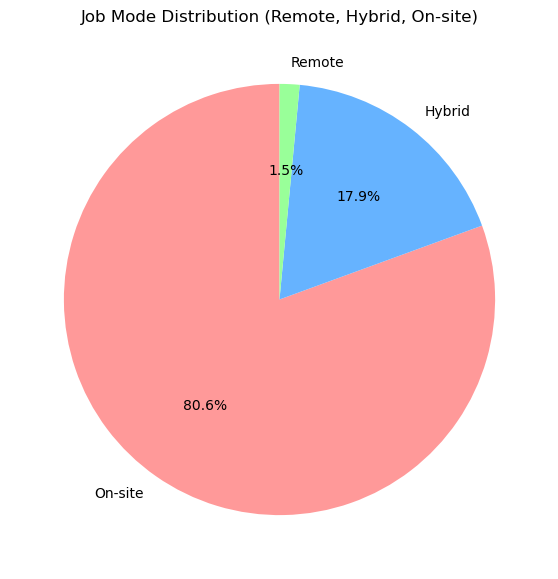

In [13]:
# 3. Job Mode Distribution (Remote, Hybrid, On-site)
hybrid_in_description = jobs_df['Location'].str.contains('Hybrid', case=False, na=False)

jobs_df.loc[hybrid_in_description, 'Job Mode'] = 'Hybrid'

job_mode_counts = jobs_df['Job Mode'].value_counts()
job_mode_counts

plt.figure(figsize=(7,7))
job_mode_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Job Mode Distribution (Remote, Hybrid, On-site)')
plt.ylabel('')  
plt.show()

Mean Salary: $171,489.98
Median Salary: $175,500.00
Max Salary: $319,875.00
Min Salary: $31,850.00


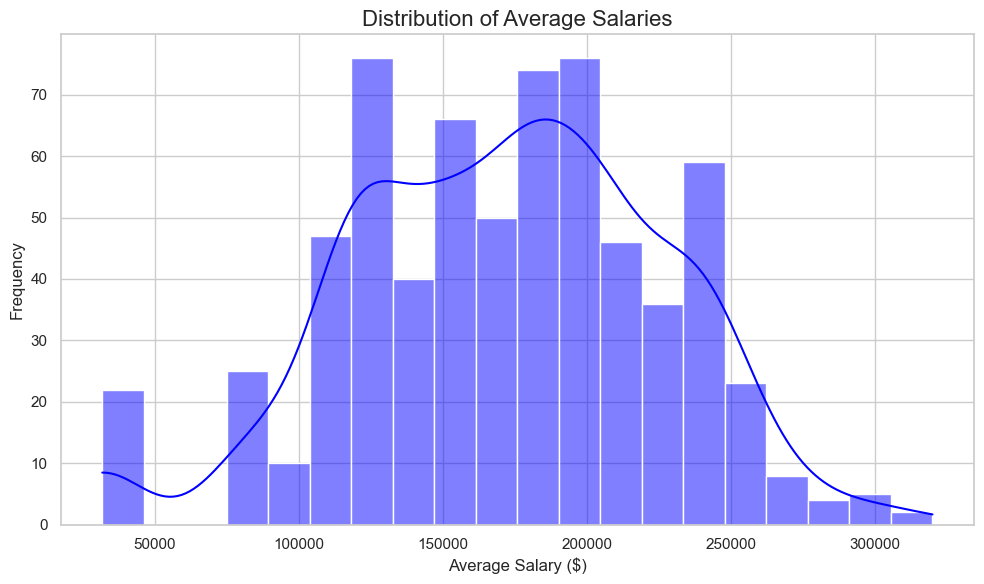

In [26]:
# 4. Salary Distribution
mean_salary = jobs_df['Average salary'].mean()
median_salary = jobs_df['Average salary'].median()
max_salary = jobs_df['Average salary'].max()
min_salary = jobs_df['Average salary'].min()
print(f"Mean Salary: ${mean_salary:,.2f}")
print(f"Median Salary: ${median_salary:,.2f}")
print(f"Max Salary: ${max_salary:,.2f}")
print(f"Min Salary: ${min_salary:,.2f}")

# Histogram of Average Salary
plt.figure(figsize=(10, 6))
sns.histplot(jobs_df['Average salary'], bins=20, kde=True, color='blue')
plt.title('Distribution of Average Salaries', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

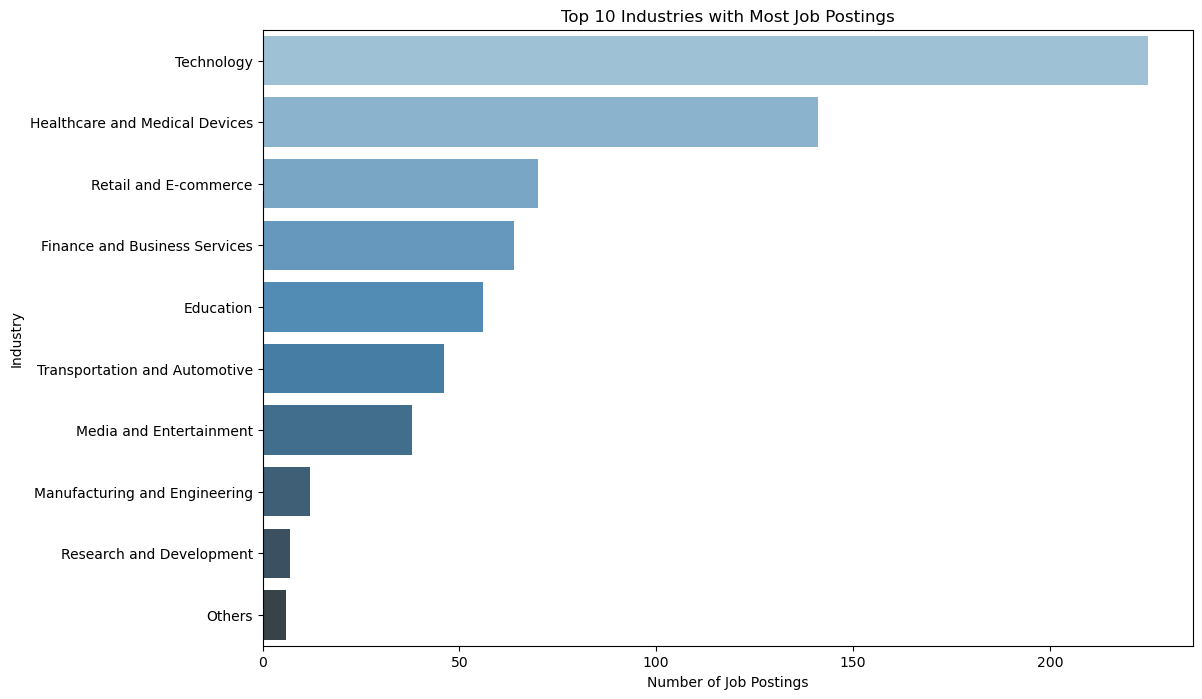

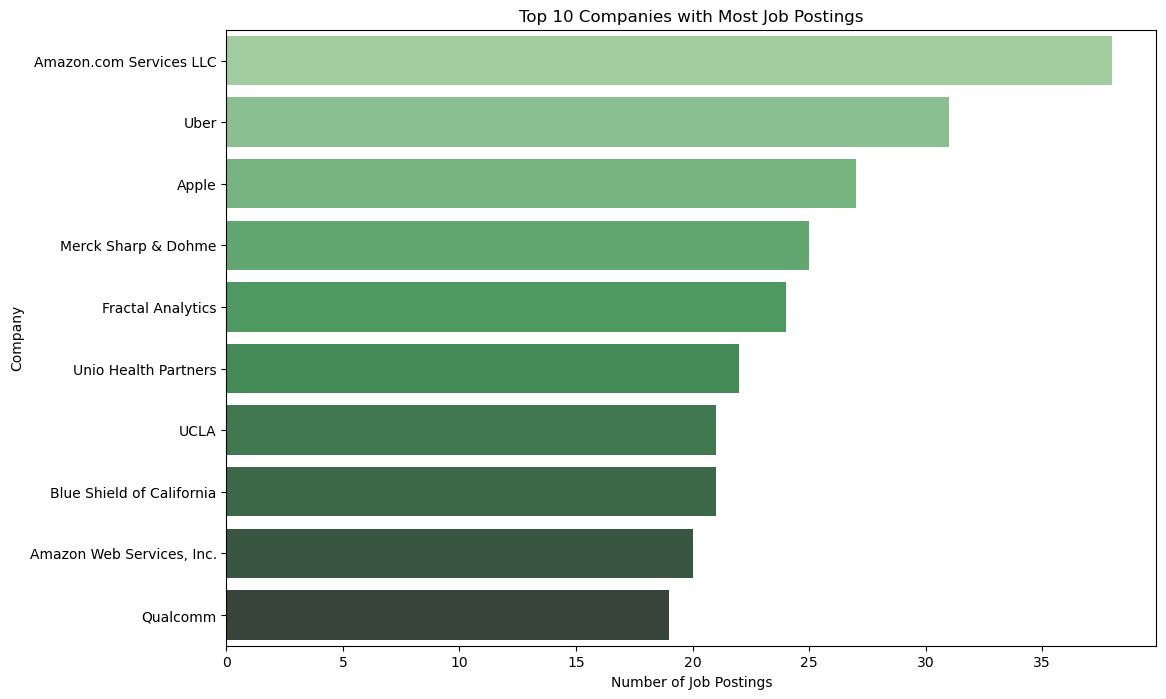

In [15]:
# 5. Industry and Company Distribution
# Count the number of job postings by industry
industry_count = jobs_df['Industry grouping'].value_counts().reset_index()
industry_count.columns = ['Industry grouping', 'Job Count']

# Count the number of job postings by company
company_count = jobs_df['Company'].value_counts().reset_index()
company_count.columns = ['Company', 'Job Count']

# Top 10 industries
top_industries = industry_count.head(10)

# Top 10 companies
top_companies = company_count.head(10)

# Plot: Top 10 Industries
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Count', y='Industry grouping', data=top_industries, palette='Blues_d')
plt.title('Top 10 Industries with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Industry')
plt.show()

# Plot: Top 10 Companies
plt.figure(figsize=(12, 8))
sns.barplot(x='Job Count', y='Company', data=top_companies, palette='Greens_d')
plt.title('Top 10 Companies with Most Job Postings')
plt.xlabel('Number of Job Postings')
plt.ylabel('Company')
plt.show()

In [16]:
### COMPARATIVE ANALYSIS ###

  Job Mode    median           mean
0   Hybrid  182500.0  172572.041667
1  On-site  175500.0  171349.027829
2   Remote  150000.0  166102.800000


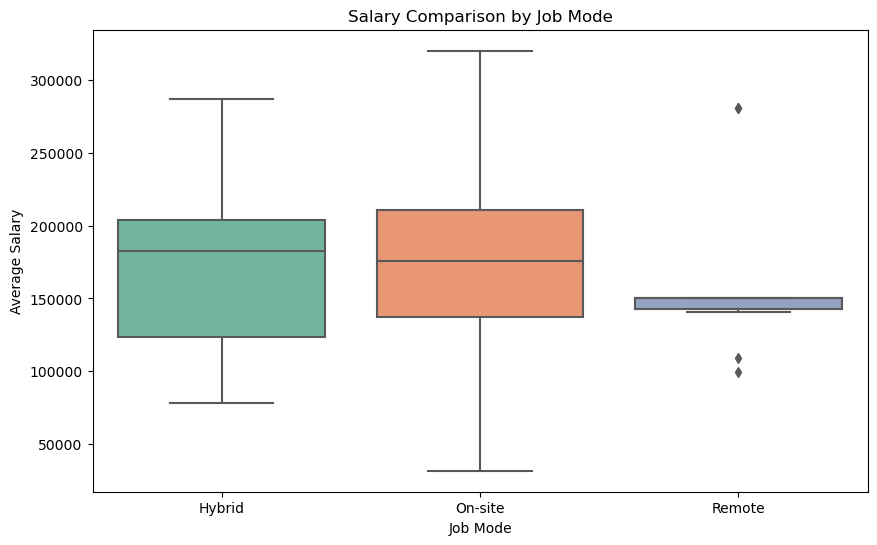

In [17]:
# 1. Salary Comparison by Job Mode
jobs_df = jobs_df.dropna(subset=['Average salary'])

salary_comparison = jobs_df.groupby('Job Mode')['Average salary'].agg(['median', 'mean']).reset_index()

print(salary_comparison)
plt.figure(figsize=(10,6))
sns.boxplot(x='Job Mode', y='Average salary', data=jobs_df, palette='Set2')
plt.title('Salary Comparison by Job Mode')
plt.xlabel('Job Mode')
plt.ylabel('Average Salary')
plt.show()

                 Industry grouping    median           mean
5          Media and Entertainment  201750.0  207880.855263
4    Manufacturing and Engineering  148000.0  201820.833333
10   Transportation and Automotive  195250.0  188184.239130
8            Retail and E-commerce  179100.0  185572.714286
9                       Technology  195000.0  185502.464444
1    Finance and Business Services  142450.0  154130.570312
6                           Others  144500.0  152416.666667
7         Research and Development  124717.0  150718.857143
3   Healthcare and Medical Devices  150000.0  147794.024823
0                        Education  133750.0  141230.053571
2        Government and Regulatory  111900.0  109782.000000


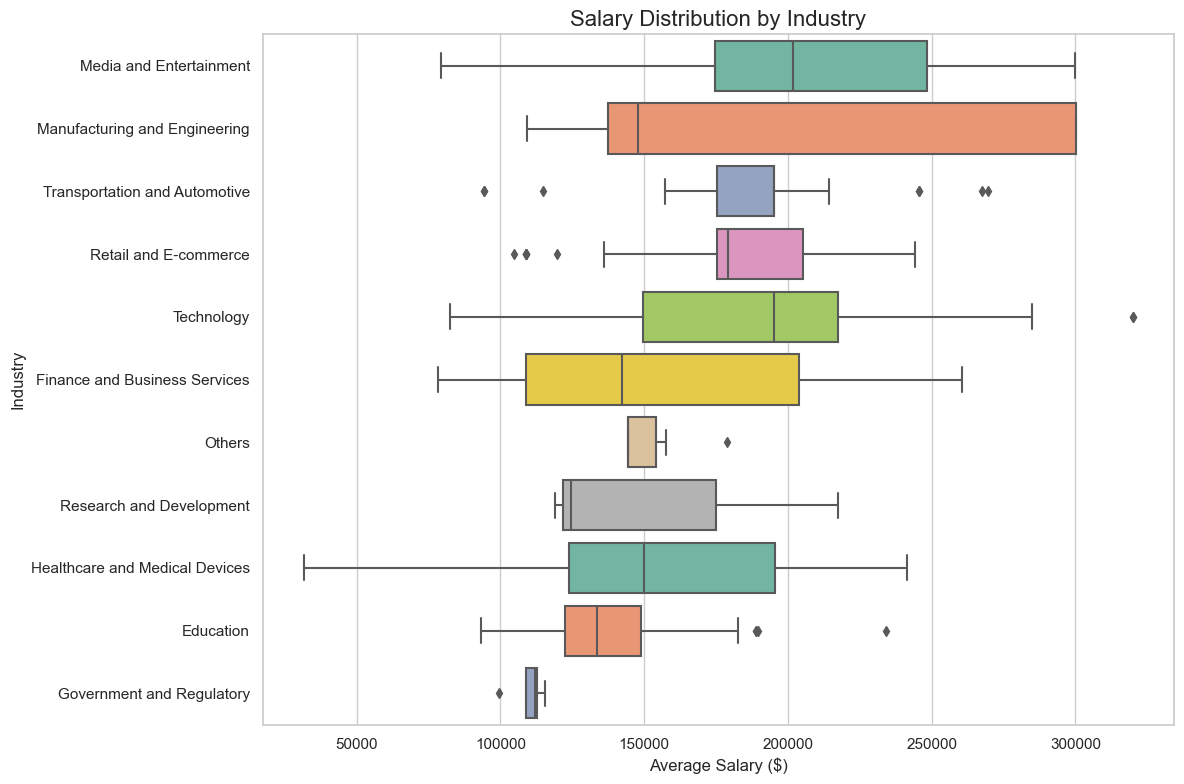

In [30]:
# 2. Salary Comparison by Industry and Company
salary_comparison_industry = jobs_df.groupby('Industry grouping')['Average salary'].agg(['median', 'mean']).reset_index()
salary_comparison_industry_sorted = salary_comparison_industry.sort_values(by='mean', ascending=False)
print(salary_comparison_industry_sorted)
sorted_order = salary_comparison_industry_sorted['Industry grouping']

# Boxplot of Average Salary by Industry
plt.figure(figsize=(12, 8))
sns.boxplot(x='Average salary', y='Industry grouping', data=jobs_df, order=sorted_order, palette="Set2")
plt.title('Salary Distribution by Industry', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.tight_layout()
plt.show()

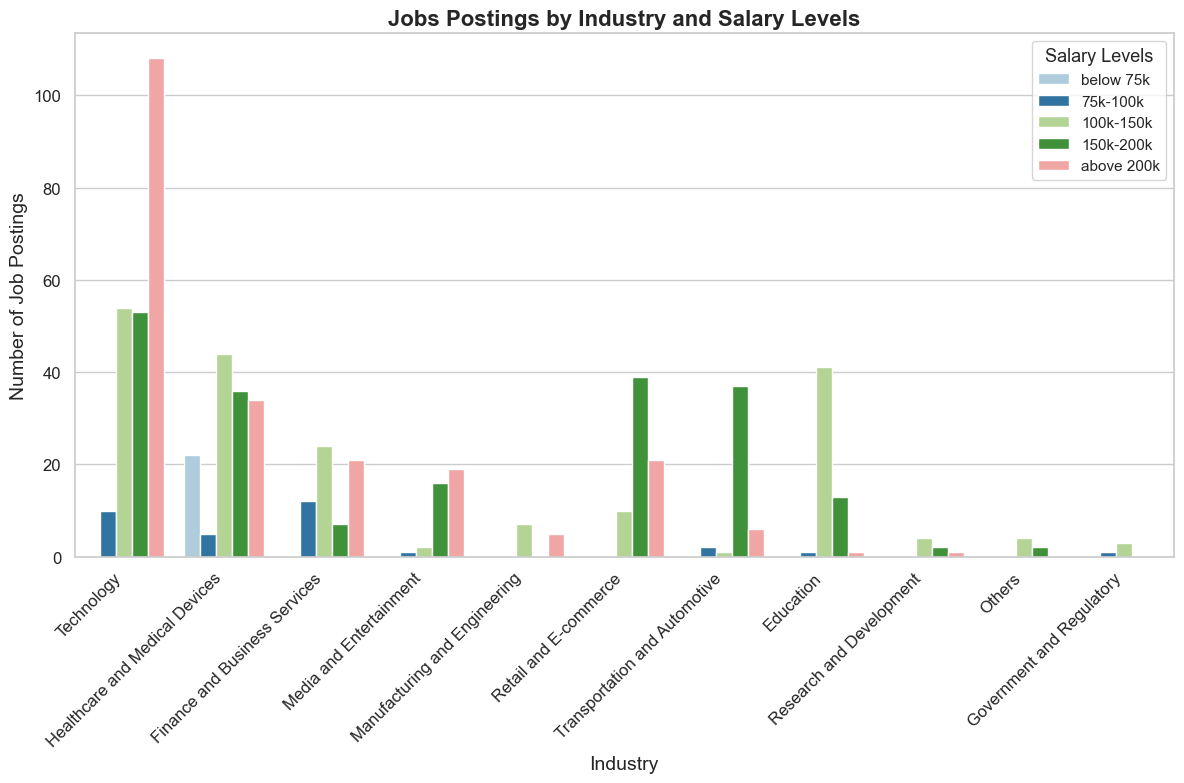

In [23]:
# 2. Salary Comparison by Industry and Company
# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
palette = sns.color_palette("Paired")

# Specify the order of salary levels
#salary_order = ['high', 'medium', 'low']
salary_order = ['below 75k', '75k-100k', '100k-150k', '150k-200k', 'above 200k']

# Create Plot
sns.countplot(x='Industry grouping', hue='Ordinal salary range', data=jobs_df, palette=palette, hue_order=salary_order)
plt.title('Jobs Postings by Industry and Salary Levels', fontsize=16, fontweight='bold')
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Number of Job Postings', fontsize=14)
plt.legend(title='Salary Levels', title_fontsize='13', fontsize='11')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

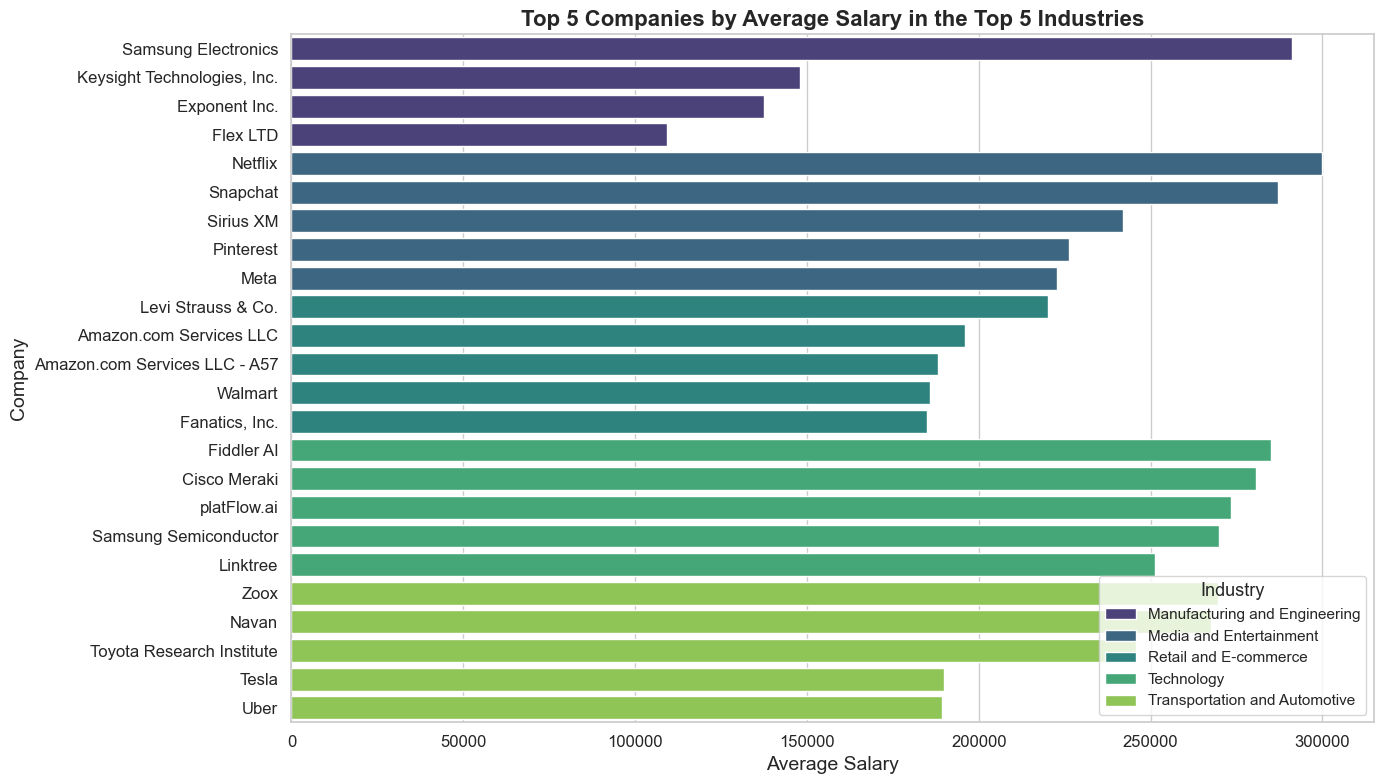

In [24]:
# 2. Salary Comparison by Industry and Company
# calculate the average salary by industry
industry_avg_salary = jobs_df.groupby('Industry grouping')['Average salary'].mean().sort_values(ascending=False)

# get the top 5 industries with the highest average salary
top_5_industries = industry_avg_salary.head(5).index

# filter the data for the top 5 industries
filtered_df = jobs_df[jobs_df['Industry grouping'].isin(top_5_industries)]

# calculate the average salary by company within these industries
company_avg_salary = (
    filtered_df.groupby(['Industry grouping', 'Company'])['Average salary']
    .mean()
    .reset_index()
)

# find the top 5 companies per industry
top_companies = (
    company_avg_salary.groupby('Industry grouping', group_keys=False)
    .apply(lambda x: x.nlargest(5, 'Average salary'))
)

# create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='Average salary',
    y='Company',
    hue='Industry grouping',
    data=top_companies,
    palette='viridis',
    dodge=False
)

# Customize plot
plt.title('Top 5 Companies by Average Salary in the Top 5 Industries', fontsize=16, fontweight='bold')
plt.xlabel('Average Salary', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.legend(title='Industry', title_fontsize='13', fontsize='11', loc='lower right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

                      City     median           mean
0                  Alameda  163900.00  168388.888889
1                 Berkeley   82500.00   82500.000000
2                  Burbank  174750.00  174750.000000
3               Burlingame  189500.00  189500.000000
4                Calabasas  148000.00  148000.000000
5                Claremont  120000.00  120000.000000
6                   Corona   82500.00   90000.000000
7              Culver City  174400.00  161470.000000
8                Cupertino  203650.00  193720.000000
9                    Davis  115493.25  115493.250000
10          East Palo Alto  130450.00  146666.666667
11             Foster City  156037.50  184393.750000
12                 Fremont  200500.00  190675.600000
13                  Fresno  105000.00  105000.000000
14                Glendale  174750.00  174750.000000
15                  Irvine  152000.00  156368.750000
16                La Jolla  124717.00  124717.000000
17               Livermore  171861.50  171861.

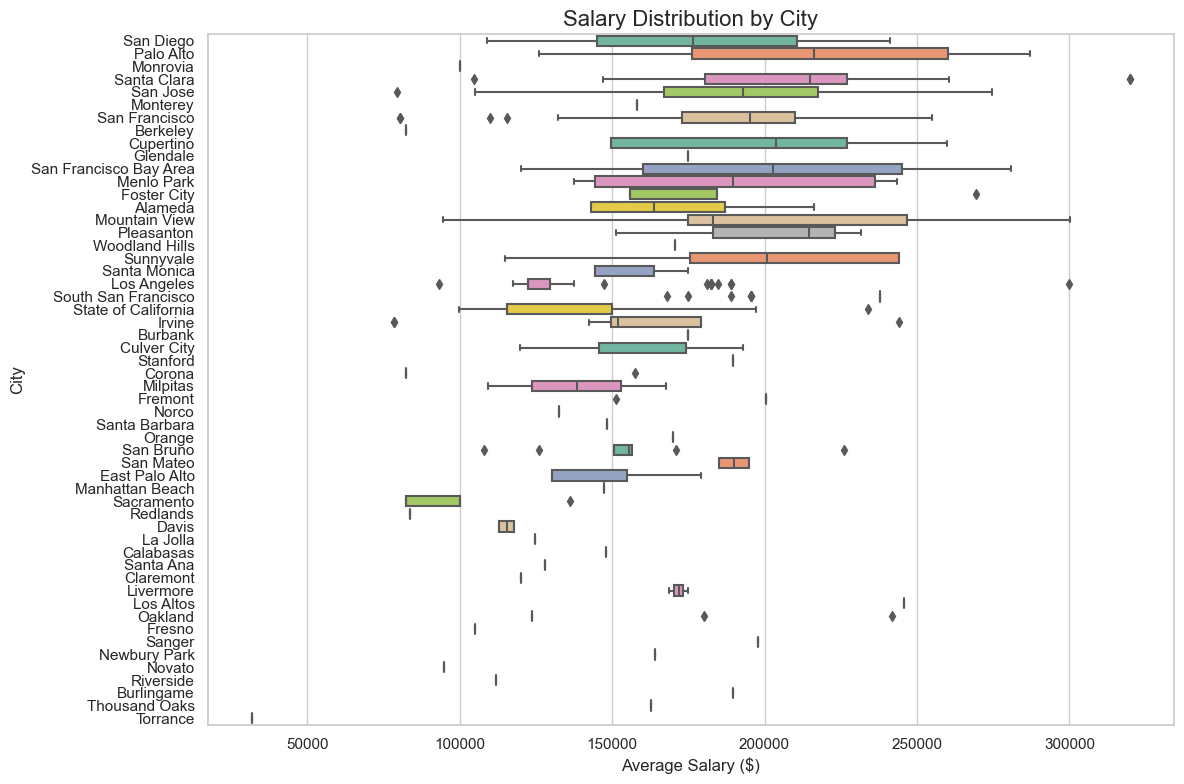

              Job Area    median           mean
0      Non SF Bay Area  144500.0  138015.289823
1          SF Bay Area  195250.0  193828.917488
2  State of California  115500.0  130832.513514


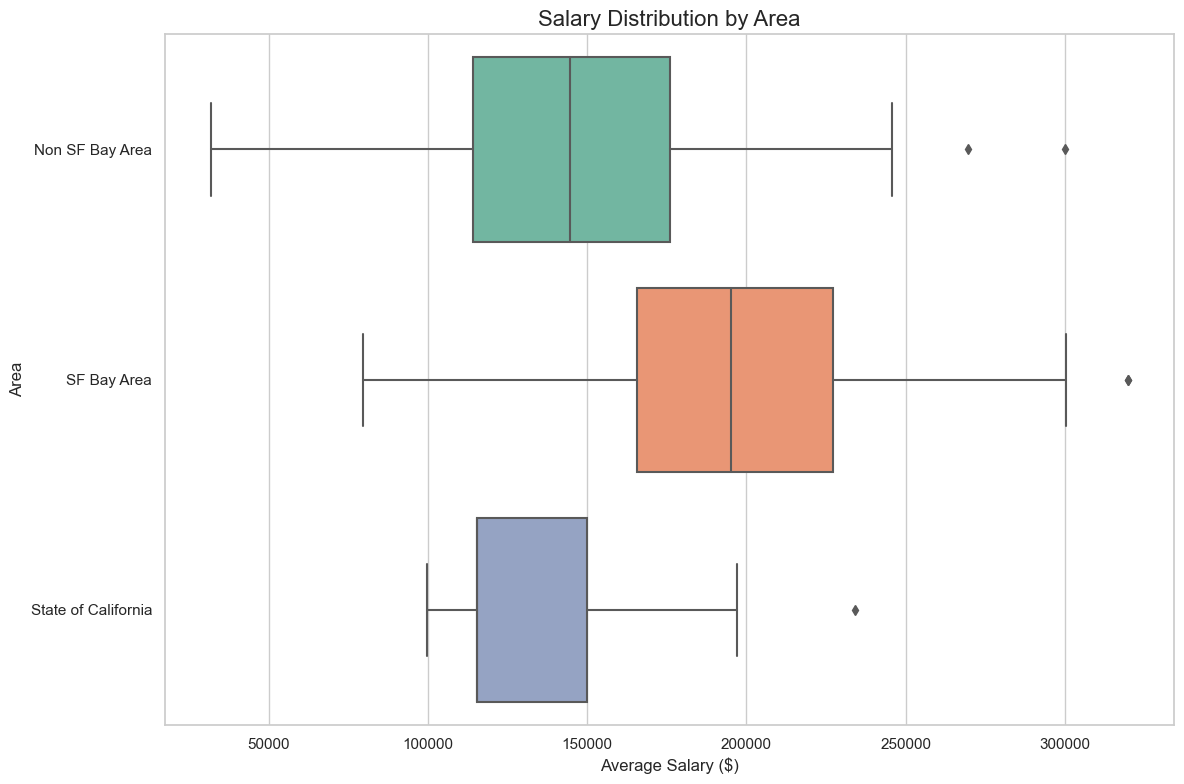

In [31]:
# 3. Salary Comparison by City/Area
# Salary table
salary_comparison_city = jobs_df.groupby('City')['Average salary'].agg(['median', 'mean']).reset_index()
print(salary_comparison_city)

# Boxplot of Average Salary by City 
plt.figure(figsize=(12, 8))
sns.boxplot(x='Average salary', y='City', data=jobs_df, palette="Set2")

# Set labels and title
plt.title('Salary Distribution by City', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('City', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

# Salary table
salary_comparison_city = jobs_df.groupby('Job Area')['Average salary'].agg(['median', 'mean']).reset_index()
print(salary_comparison_city)
# Boxplot of Average Salary by Area
plt.figure(figsize=(12, 8))
sns.boxplot(x='Average salary', y='Job Area', data=jobs_df, palette="Set2")

# Set labels and title
plt.title('Salary Distribution by Area', fontsize=16)
plt.xlabel('Average Salary ($)', fontsize=12)
plt.ylabel('Area', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()